## Домашнее задание 3.6

#### Импорт библиотек

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#### Глобальные настройки

In [85]:
np.random.seed(42)

*1. Сгенерируйте три группы данных: Group A, Group B и Group C, каждая из которых будет содержать 1000 случайных значений с нормальным распределением и с разными параметрами (разные средние значения и стандартные отклонения).*
- `group_A` - средние значения = 110, стандартное отклонение = 10
- `group_B` - средние значения = 115, стандартное отклонение = 15
- `group_C` - средние значения = 120, стандартное отклонение = 20

In [86]:
group_A = np.random.normal(loc=110, scale=10, size=1000)
group_B = np.random.normal(loc=115, scale=15, size=1000)
group_C = np.random.normal(loc=120, scale=20, size=1000)

*2. Визуализируйте полученные группы на одном графике с помощью библиотеки matplotlib.*

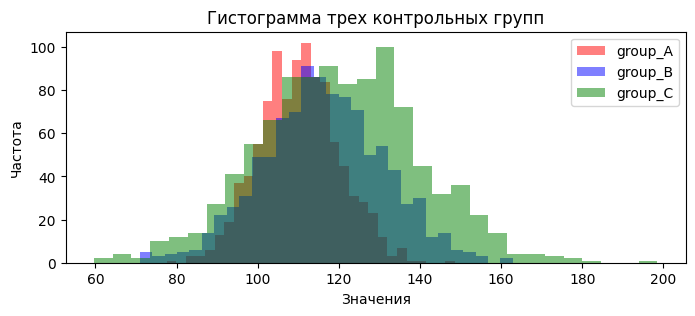

In [87]:
plt.figure(figsize=(8, 3))

plt.hist(group_A, bins=30, alpha=0.5,color='red', label='group_A')
plt.hist(group_B, bins=30, alpha=0.5,color='blue', label='group_B')
plt.hist(group_C, bins=30, alpha=0.5,color='green', label='group_C')


plt.title('Гистограмма трех контрольных групп')
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.legend(loc='upper right')

plt.show()

*3. Проведите парные t-тесты для сравнения каждой группы с другой (A/B, A/C, B/C) с помощью функции ttest_ind из библиотеки scipy.stats. Укажите уровень значимости (alpha).*

*Три пары: `group_A, group_B`, `group_A, group_C` и `group_B, group_C`*
- `alpha` уровень значимости для теста
- `t_stat..` - t-статистика
- `p_value..` - p-значение



In [88]:
alpha = 0.05

t_stat_AB, p_value_AB = ttest_ind(group_A, group_B)
t_stat_AC, p_value_AC = ttest_ind(group_A, group_C)
t_stat_BC, p_value_BC = ttest_ind(group_B, group_C)

*4. Выведите результаты анализа для каждого сравнения, указав значения p-value.*

In [89]:
print(f'''
       group_A, group_B: t-statistic = {t_stat_AB}, p-value = {p_value_AB}
       group_A, group_C: t-statistic = {t_stat_AC}, p-value = {p_value_AC}
       group_B, group_C: t-statistic = {t_stat_BC}, p-value = {p_value_BC}
       ''')


       group_A, group_B: t-statistic = -10.37959849844661, p-value = 1.280939288513203e-24
       group_A, group_C: t-statistic = -14.282149650429723, p-value = 3.894671853150199e-44
       group_B, group_C: t-statistic = -5.187696973562293, p-value = 2.3445993075797856e-07
       


*5. Сделайте выводы о статистической значимости различий между группами и сравните их с ожидаемыми результатами А/А тестирования.*

In [90]:
def conclusion_a_a_test(*args):
    group1, group2, p_value, alpha = args
    message_good = f'Статистичиески значимых различий между группами {group1} и {group2} не обнаружено.'
    message_failure = f'Обнаружены статистические значимые различия между группами {group1} и {group2}.'
    return message_good if p_value < alpha else message_failure


print(conclusion_a_a_test('A', 'B', p_value_AB, alpha))
print(conclusion_a_a_test('A', 'C', p_value_AC, alpha))
print(conclusion_a_a_test('B', 'C', p_value_BC, alpha))

print('\nВ данном случае А/А тестирование подтверждает стабильность и надежность эксперимента,\nтак как все контрольные группы между собой имеют идентичность')

Статистичиески значимых различий между группами A и B не обнаружено.
Статистичиески значимых различий между группами A и C не обнаружено.
Статистичиески значимых различий между группами B и C не обнаружено.

В данном случае А/А тестирование подтверждает стабильность и надежность эксперимента,
так как все контрольные группы между собой имеют идентичность
